# Lab 7-4 랜덤 포레스트 트리

## 라이브러리 import

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## 데이터 준비

In [28]:
df_wine = pd.read_csv('../data/wine.csv')
df_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


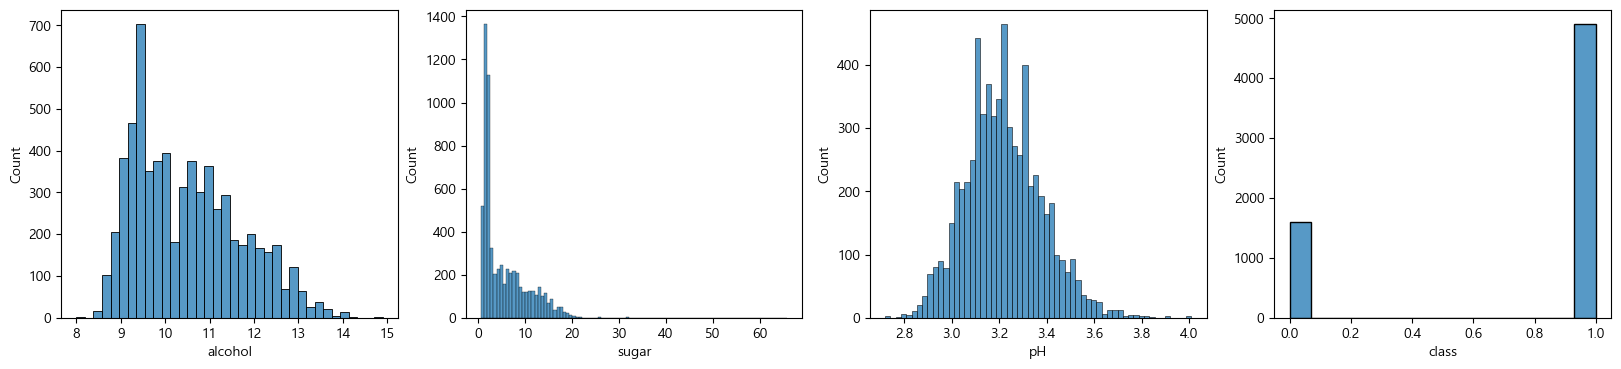

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
#sns.scatterplot(data=df, x=df.CRIM, y=df.MEDV)
for i, col_name in enumerate(df_wine.columns):
    ax = axes[i]
    sns.histplot(x=df_wine[col_name], ax=ax)
plt.show()
plt.close()

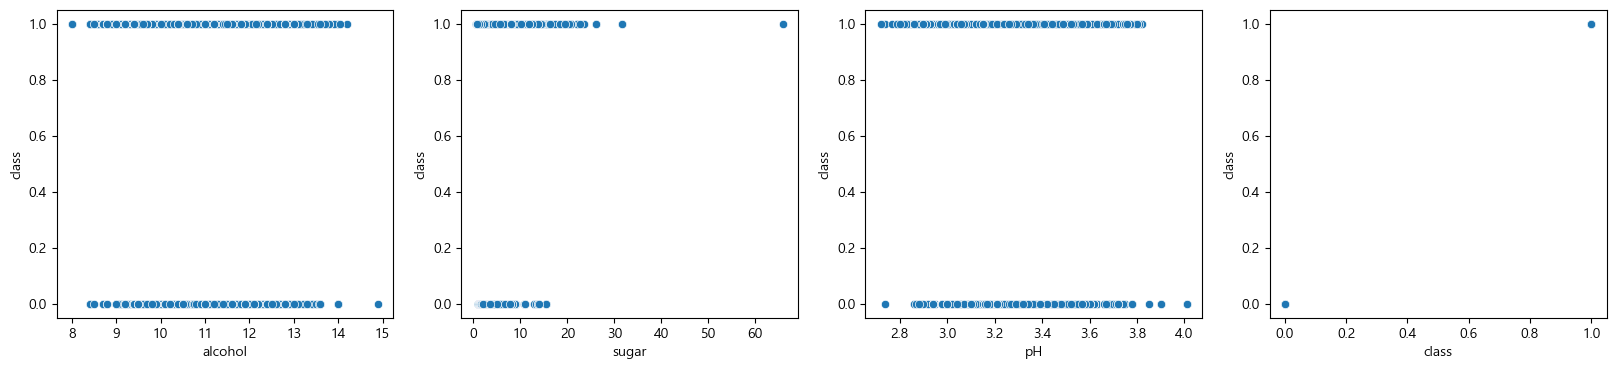

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
#sns.scatterplot(data=df, x=df.CRIM, y=df.MEDV)
for i, col_name in enumerate(df_wine.columns):
    ax = axes[i]
    sns.scatterplot(data=df_wine, x=col_name, y=df_wine['class'], ax=ax)

In [3]:
data = df_wine[['alcohol','sugar','pH']].to_numpy()
target = df_wine['class'].to_numpy()

In [4]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [5]:
print(train_input.shape)
print(test_input.shape)

(5197, 3)
(1300, 3)


## 모델 생성, 학습, 평가

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf = RandomForestClassifier(n_jobs=1, random_state=42)

In [8]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [9]:
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.996921300750433
0.8892307692307693


## 노드 Depth 제한

In [10]:
rf = RandomForestClassifier(max_depth=12, n_jobs=2, random_state=42)

In [11]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.20941396 0.54265314 0.2479329 ]


In [12]:
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.9717144506446026
0.8861538461538462


## 시각화

In [16]:
from sklearn.tree import export_graphviz

In [22]:
print(rf.estimators_)

estimator = rf.estimators_[1]
export_graphviz(estimator, out_file='tree.dot',
                feature_names = df_wine.columns[:3],
                class_names = ['red','white'],
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
                )

[DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=1608637542), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=1273642419), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=1935803228), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=787846414), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=996406378), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=1201263687), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=423734972), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=415968276), DecisionTreeClassifier(max_depth=12, max_features='sqrt',
                       random_state=670094950), DecisionTreeClassifier(max_depth=12, max_

In [23]:
import graphviz

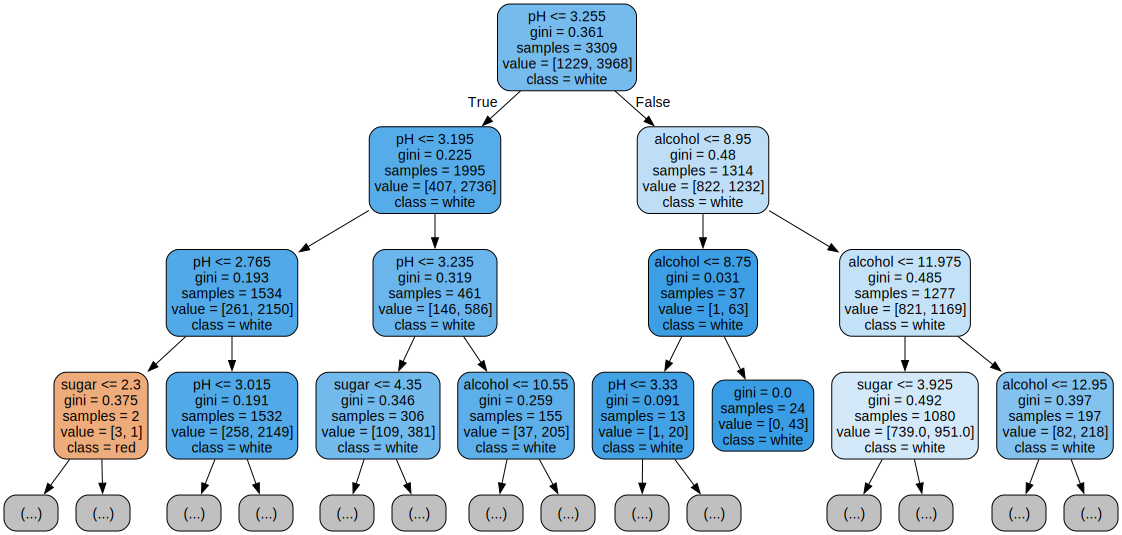

In [24]:
with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

<Axes: >

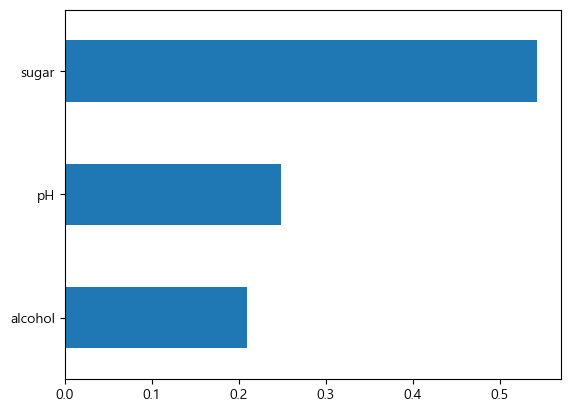

In [26]:
feature_importance = pd.Series(rf.feature_importances_, index=df_wine.columns[:3])
feature_importance.sort_values(ascending=True).plot(kind="barh")